# Proteasome proteins' expression in tumor vs. normal samples

This notebook uses permutation testing to investigate the abundance levels of proteins making up the proteasome in tumor vs. normal samples.

Import needed packages.

In [11]:
import cptac
import pcanalyzer as pc
import seaborn as sns
import matplotlib.pyplot as plt

Load the datasets.

In [ ]:
datasets = []

#datasets.append(cptac.Brca()) # Brca has no normal samples
datasets.append(cptac.Ccrcc())
#datasets.append(cptac.Colon())
#datasets.append(cptac.Endometrial())

#datasets.append(cptac.Gbm())
#datasets.append(cptac.Hnscc())

#datasets.append(cptac.Lscc())
#datasets.append(cptac.Luad())

#datasets.append(cptac.Ovarian())

Get a list of proteins within the proteasome.

In [3]:
protein_lists = pc.get_member_proteins()

In [6]:
cc = cptac.Ccrcc()

In [7]:
data = cc.get_proteomics()["PSMB5"]

In [18]:
diff, P, dist = pc.permutation_test_means(data, 1000000)

In [19]:
diff

1.0176144610974642

In [20]:
P

0.0

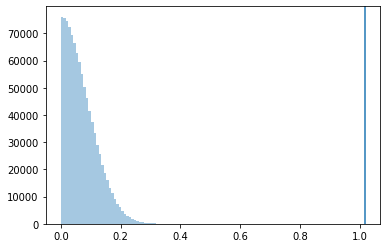

In [21]:
fig, ax = plt.subplots()
sns.distplot(dist, ax=ax, kde=False)
plt.axvline(diff, 0, 4)
plt.show()